# T-SNE on Face Expression Recognition (FER) Dataset 
https://www.kaggle.com/ananthu017/emotion-detection-fer 

"The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear)."

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.colors as mcolors

root_dir = '../archive/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

for item in range(len(train_files)-1):
    if train_files[item].startswith('.'):
        train_files.pop(item)
    if test_files[item].startswith('.'):
        test_files.pop(item)
        
print('categories --',train_files)
#print('test_files  --',test_files)

categories -- ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']


In [36]:
def get_images(train_dir, test_dir, N): 
    #returns a training and test dictionary of image paths in png
    #where keys are labels and values are lists of N number of image paths
    train_emo = {}
    test_emo = {}
    for emotion in train_files:
        path = train_dir + '{}/'.format(emotion)
        files = os.listdir(path)
        train_emo[emotion] = files[:N]
    for emoti in test_files:
        pth = test_dir + '{}/'.format(emoti)
        fls = os.listdir(pth)
        test_emo[emoti] = fls[:N]
    return test_emo, train_emo

def png_to_np(directory, dictionary):
    #returns an np array of images where rows are flattened image arrays
    #and columns are features (flattened)
    labels = dictionary.keys()
    img_nps = np.zeros((2304,), dtype=int)
    img_lbls = []
    c = 0
    for i in labels: #for each emotion
        for image in dictionary[i]:
            arr = imageio.imread(directory + i + '/'+image)
            flat_arr = arr.flatten()
            img_nps = np.vstack((img_nps,flat_arr))
            img_lbls.append(c)
        c+=1
    img_nps = np.delete(img_nps,0,0)
    img_lbls = np.array(img_lbls)
    return img_nps, img_lbls
            

tr, ts = get_images(train_dir, test_dir, N=1000) #dictionaries of image paths with labels 
tr_imgs, tr_lbls = png_to_np(train_dir, tr)

#test_images = png_to_np(test_dir, ts) ###problem with loading this 
#ys = np.arange(7) #emotion labels

In [37]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca = pca.fit_transform(tr_imgs)
tr_imgs


array([[ 67,  65,  50, ..., 193, 255, 252],
       [226, 226, 227, ..., 180, 183, 192],
       [ 51,  52,  52, ..., 216, 217, 218],
       ...,
       [ 96, 122, 137, ...,  50,  43,  43],
       [211, 166,  75, ...,  28,  30,  29],
       [214, 217, 218, ..., 192, 194, 201]])

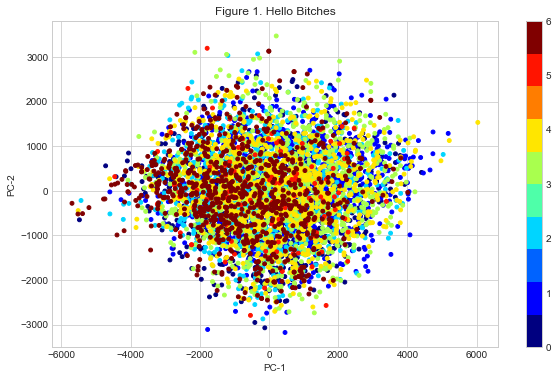

In [38]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)

plt.scatter(pca[:, 0], pca[:, 1], s = 15,
            cmap = c_map , c = tr_lbls) 
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.title('Figure 1. Hello Bitches')
plt.show()

In [39]:
tsne = TSNE(learning_rate=2)
TSNE_features = tsne.fit_transform(pca)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

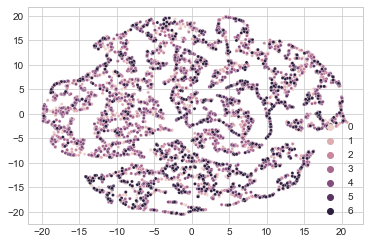

In [40]:
a = TSNE_features[:,0]
b = TSNE_features[:,1]
sns.scatterplot(a,b,hue=tr_lbls, legend='full',s=10)#, hue=y, legend='full')